# Final Project - Part 4 - Model Draft 4B (Ellein Cheng)

## 4B) Random Forest (Input: Demographics & Recruiter Relation; Output: Type of Labor)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score,train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.base import BaseEstimator
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
import random
import matplotlib.pyplot as plt
import pdb

C:\Users\ellei\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Read Cleaned Global Data
GD_data_final = pd.read_csv('assets/GD_data_final.csv')
GD_data_final.head()

,yearOfRegistration,gender,majorityStatus,ageBroad_mid,citizenshipRegion,citizenshipGeoCategory,exploitationRegion,exploitationGeoCategory,mocDebtBondage,mocTakesEarnings,...,tosProstitution,tosPornography,tosRemoteInteractiveServices,tosPrivateSexualServices,tosNotSpecified,rrIntimatePartner,rrFriend,rrFamily,rrOther,rrUnknown
0,2010,Female,Adult,19.0,Central_Asia,Asia,Central_Asia,Asia,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2004,Female,Adult,19.0,Eastern_Europe,Europe,Eastern_Europe,Europe,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2010,Female,Adult,19.0,Central_Asia,Asia,Central_Asia,Asia,1,0,...,0,0,0,0,1,0,0,0,0,1
3,2010,Female,Adult,19.0,Central_Asia,Asia,Central_Asia,Asia,1,0,...,0,0,0,0,1,0,0,0,0,1
4,2012,Female,Minor,13.0,North_America,North_America,North_America,North_America,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
GD_data_final.columns

Index([u'yearOfRegistration', u'gender', u'majorityStatus', u'ageBroad_mid',
       u'citizenshipRegion', u'citizenshipGeoCategory', u'exploitationRegion',
       u'exploitationGeoCategory', u'mocDebtBondage', u'mocTakesEarnings',
       u'mocRestrictsFinancialAccess', u'mocThreats', u'mocPsychologicalAbuse',
       u'mocPhysicalAbuse', u'mocSexualAbuse', u'mocFalsePromises',
       u'mocPsychoactiveSubstances', u'mocRestrictsMovement',
       u'mocRestrictsMedicalCare', u'mocExcessiveWorkingHours',
       u'mocUsesChildren', u'mocThreatOfLawEnforcement',
       u'mocWithholdsNecessities', u'mocWithholdsDocuments', u'mocOther',
       u'mocNotSpecified', u'isForcedLabour', u'isSexualExploit',
       u'isOtherExploit', u'isSexAndLabour', u'isForcedMarriage',
       u'isForcedMilitary', u'isOrganRemoval', u'tolAgriculture',
       u'tolAquafarming', u'tolBegging', u'tolConstruction',
       u'tolDomesticWork', u'tolHospitality', u'tolIllicitActivities',
       u'tolManufacturing', u'tolM

In [4]:
# Read Demographic vs Labor Type Data - Only for isForcedLabour == 1
demo_labortype_calc = pd.read_csv('assets/demo_labortype_calc.csv')
demo_labortype_calc.reset_index(drop=True)
demo_labortype_calc.head()

,yearOfRegistration,ageBroad_mid,g_Female,g_Male,ms_Adult,cr_Central_Asia,cr_East_Africa,cr_East_Asia,cr_Eastern_Europe,cr_Middle_East,...,tolConstruction,tolDomesticWork,tolHospitality,tolIllicitActivities,tolManufacturing,tolMiningOrDrilling,tolPeddling,tolTransportation,tolOther,tolNotSpecified
0,2012,13.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2012,13.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2012,13.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,13.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
demo_labortype_calc.columns

Index([u'yearOfRegistration', u'ageBroad_mid', u'g_Female', u'g_Male',
       u'ms_Adult', u'cr_Central_Asia', u'cr_East_Africa', u'cr_East_Asia',
       u'cr_Eastern_Europe', u'cr_Middle_East', u'cr_North_America',
       u'cr_Northeast_Africa', u'cr_South_America', u'cr_South_Asia',
       u'cr_Southeast_Asia', u'cr_Southeastern_Europe', u'cr_Unknown',
       u'cr_West_Africa', u'cg_Africa', u'cg_Asia', u'cg_Europe',
       u'cg_Middle_East', u'cg_North_America', u'cg_South_America',
       u'cg_Unknown', u'tolAgriculture', u'tolAquafarming', u'tolBegging',
       u'tolConstruction', u'tolDomesticWork', u'tolHospitality',
       u'tolIllicitActivities', u'tolManufacturing', u'tolMiningOrDrilling',
       u'tolPeddling', u'tolTransportation', u'tolOther', u'tolNotSpecified'],
      dtype='object')

In [6]:
# Carve out Just Recruiter Relation data
GD_data_Labor = GD_data_final[GD_data_final['isForcedLabour']==1].reset_index(drop=True)
rr_Labor_handCalc = GD_data_Labor[['rrIntimatePartner','rrFriend','rrFamily','rrOther','rrUnknown']]
rr_Labor_handCalc.reset_index(drop=True)
rr_Labor_handCalc.head()
rr_test = rr_Labor_handCalc

In [7]:
## JOIN Demographics, Means of Control, and Recruiter Relation data
#demo_rr_labortype_calc = demo_labortype_calc.join(rr_Labor_handCalc)
demo_rr_Labortype_calc = pd.concat([demo_labortype_calc,rr_test],axis=1)
demo_rr_Labortype_calc.head()
len(demo_rr_Labortype_calc)

6750

In [8]:
### Consolidate all types of labor into one column

def combine_laborType(x):
    if x['tolAgriculture'] == 1:
        return 'Agriculture'
    elif x['tolAquafarming'] == 1:
        return 'Aquafarming'
    elif x['tolBegging'] == 1:
        return 'Begging'
    elif x['tolConstruction'] == 1:
        return 'Construction'
    elif x['tolDomesticWork'] == 1:
        return 'DomesticWork'
    elif x['tolHospitality'] == 1:
        return 'Hospitality'
    elif x['tolIllicitActivities'] == 1:
        return 'IllicitActivities'
    elif x['tolManufacturing'] == 1:
        return 'Manufacturing'
    elif x['tolMiningOrDrilling'] == 1:
        return 'MiningOrDrilling'
    elif x['tolPeddling'] == 1:
        return 'Peddling'
    elif x['tolTransportation'] == 1:
        return 'Transportation'
    elif x['tolOther'] == 1:
        return 'Other'
    elif x['tolNotSpecified'] == 1:
        return 'NotSpecified'
    else:
        return 0
        
demo_rr_Labortype_calc['LaborType'] = demo_rr_Labortype_calc.apply(combine_laborType,axis=1)
demo_rr_Labortype_calc.head()


,yearOfRegistration,ageBroad_mid,g_Female,g_Male,ms_Adult,cr_Central_Asia,cr_East_Africa,cr_East_Asia,cr_Eastern_Europe,cr_Middle_East,...,tolPeddling,tolTransportation,tolOther,tolNotSpecified,rrIntimatePartner,rrFriend,rrFamily,rrOther,rrUnknown,LaborType
0,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,DomesticWork
1,2012,13.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,DomesticWork
2,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,DomesticWork
3,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,DomesticWork
4,2012,13.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,NotSpecified


In [12]:
print (len(demo_rr_Labortype_calc))
print (len(GD_data_Labor))

6750
6750


Random Forest Train Accuracy ::  0.840211640212
Random Forest Logistic regression Test Accuracy ::  0.826172839506
Cross validating...
Random Forest - train accuracy: 


C:\Users\ellei\Anaconda2\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.832612959825
X: 
Index([u'ageBroad_mid', u'g_Female', u'ms_Adult', u'cr_Central_Asia',
       u'cr_East_Africa', u'cr_East_Asia', u'cr_Eastern_Europe',
       u'cr_Middle_East', u'cr_North_America', u'cr_Northeast_Africa',
       u'cr_South_America', u'cr_South_Asia', u'cr_Southeast_Asia',
       u'cr_Southeastern_Europe', u'cr_West_Africa', u'rrIntimatePartner',
       u'rrFriend', u'rrFamily', u'rrOther'],
      dtype='object')
Feature Importance: 
[ 0.133  0.102  0.029  0.054  0.027  0.     0.147  0.014  0.053  0.     0.
  0.02   0.125  0.     0.019  0.002  0.015  0.019  0.24 ]


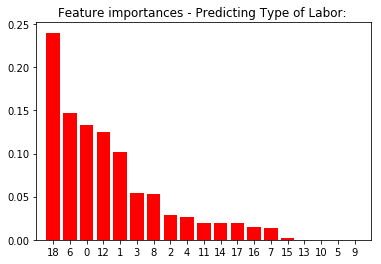

Classes: 
['Agriculture' 'Aquafarming' 'Begging' 'Construction' 'DomesticWork'
 'Hospitality' 'Manufacturing' 'NotSpecified' 'Other' 'Peddling']
Average Probabilities by gender: 
        pp_Agriculture  pp_Aquafarming  pp_Begging  pp_Construction  \
gender                                                                
Female        0.034645        0.000038    0.029586         0.006170   
Male          0.031639        0.022178    0.021404         0.242558   

        pp_DomesticWork  pp_Hospitality  pp_Manufacturing  pp_NotSpecified  \
gender                                                                       
Female         0.135015        0.000000          0.072224         0.688418   
Male           0.010637        0.002281          0.027376         0.618636   

        pp_Other  pp_Peddling  
gender                         
Female  0.033901     0.000005  
Male    0.018336     0.004937  
Average Probabilites by majorityStatus: 
                pp_Agriculture  pp_Aquafarming  pp_Beg

In [16]:
# Try OneVsRestClassifier - Multilabel classification method
def main():
    #headers = ['ageBroad_mid', 'g_Female', 'ms_Adult', 
                              #'cr_Central_Asia', 'cr_East_Africa', 'cr_East_Asia', 'cr_Eastern_Europe', 'cr_Middle_East', 
                              #'cr_North_America', 'cr_Northeast_Africa', 'cr_South_America', 'cr_South_Asia', 
                              #'cr_Southeast_Asia', 'cr_Southeastern_Europe', 'cr_West_Africa', 
                              #'cg_Africa', 'cg_Asia', 'cg_Europe', 'cg_Middle_East', 'cg_North_America', 'cg_South_America', 
                                #'rrIntimatePartner', 'rrFriend', 'rrFamily', 'rrOther',
                              # 'LaborType']
    headers = ['ageBroad_mid','g_Female', 'ms_Adult',
                              'cr_Central_Asia', 'cr_East_Africa', 'cr_East_Asia', 'cr_Eastern_Europe', 'cr_Middle_East', 
                              'cr_North_America', 'cr_Northeast_Africa', 'cr_South_America', 'cr_South_Asia', 
                              'cr_Southeast_Asia', 'cr_Southeastern_Europe', 'cr_West_Africa',    
                                'rrIntimatePartner', 'rrFriend', 'rrFamily', 'rrOther', 
                                 'LaborType']
    
    ### Train Test Split - Out put col index -1 
    X = demo_rr_Labortype_calc[headers[:-1]]
    y = demo_rr_Labortype_calc[headers[-1]]
    train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7)
    
    model = RandomForestClassifier(n_estimators=500)
    model.fit(train_x, train_y)

    print "Random Forest Train Accuracy :: ", metrics.accuracy_score(train_y, model.predict(train_x))
    print "Random Forest Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, model.predict(test_x))
    
    print ("Cross validating...")
    print ("Random Forest - train accuracy: ")
    print (np.mean(cross_val_score(model, train_x, train_y.values, scoring='accuracy', cv=10)))

    print ("X: ")
    print (X.columns)
    
    #Feature Importances - Break down weights of each feature
    print ("Feature Importance: ")
    importances = model.feature_importances_.round(3)
    print (importances)
    
    ## Graphing Feature Importances
    std = np.std([importances],axis=0)
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances - Predicting Type of Labor: ")
    plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
    print ("Classes: ")
    print (model.classes_)
    
    
    # Predict Probabilities
    #pp = model.predict_proba(X)    
    cols = ['pp_Agriculture', 'pp_Aquafarming', 'pp_Begging', 'pp_Construction', 'pp_DomesticWork', 'pp_Hospitality', 
            'pp_Manufacturing', 'pp_NotSpecified', 'pp_Other', 'pp_Peddling']    
    df_pp = pd.DataFrame(model.predict_proba(X).round(4),columns=cols)
    df_data_pp = GD_data_Labor.join(df_pp)
    #df_pp.head()
    

    # GROUP BYs different demographics
    print ("Average Probabilities by gender: ")
    print (df_data_pp[['gender','pp_Agriculture', 'pp_Aquafarming', 'pp_Begging', 'pp_Construction', 'pp_DomesticWork', 'pp_Hospitality', 
            'pp_Manufacturing', 'pp_NotSpecified', 'pp_Other', 'pp_Peddling']].groupby('gender').mean())

    print ("Average Probabilites by majorityStatus: ")
    print (df_data_pp[['majorityStatus','pp_Agriculture', 'pp_Aquafarming', 'pp_Begging', 'pp_Construction', 'pp_DomesticWork', 'pp_Hospitality', 
            'pp_Manufacturing', 'pp_NotSpecified', 'pp_Other', 'pp_Peddling']].groupby('majorityStatus').mean())
    
    print ("Average Probabilites by ageBroad_mid: ")
    print (df_data_pp[['ageBroad_mid','pp_Agriculture', 'pp_Aquafarming', 'pp_Begging', 'pp_Construction', 'pp_DomesticWork', 'pp_Hospitality', 
            'pp_Manufacturing', 'pp_NotSpecified', 'pp_Other', 'pp_Peddling']].groupby('ageBroad_mid').mean())
    
    print ("Average Probabilites by citizenshipRegion: ")
    print (df_data_pp[['citizenshipRegion','pp_Agriculture', 'pp_Aquafarming', 'pp_Begging', 'pp_Construction', 'pp_DomesticWork', 'pp_Hospitality', 
            'pp_Manufacturing', 'pp_NotSpecified', 'pp_Other', 'pp_Peddling']].groupby('citizenshipRegion').mean())
    
if __name__ == '__main__':
  main()